In [1]:
import GCMPy as gp
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

## Import Peterson & Barney 1952 as pb52, convert to Bark

In [2]:
pb52=pd.read_csv('pb52.csv')
pbbark = gp.HzToBark(pb52,["F0","F1","F2","F3"])
pbbark.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
1017,w,f,51,GOOSE,2,250,325,750,2500,2.502805,3.283239,6.889742,14.498027
286,m,m,15,TRAP,1,133,620,1710,2110,1.173645,5.912713,11.961853,13.369042
1164,w,f,59,DRESS,1,242,730,2300,3100,2.416421,6.745576,13.944883,15.895099
1512,c,f,76,THOUGHT,1,300,910,1200,3180,3.028850,7.970732,9.651013,16.056732
91,m,m,5,PALM,2,126,720,1260,2020,1.089396,6.672687,9.960870,13.077085


## Set some parameters

In [24]:
# set c, the sensitivity of exemplar cloud
cval=5

# set dimesnsions m as keys, 
    ## set weight of each dimension w_m as values
dimsvals={'z0':1,'z1':2.953,'z2':.924,'z3':3.420}

# set categories to be considered as items in a list
catslist=['vowel','type']

# Get a balanced test set, 50 obs per vowel
test = gp.gettestset(pbbark,'vowel',50)

## Categorize all data

In [25]:
choices = gp.multicat(test,pbbark,catslist,dimsvals,cval,exclude_self=True,alsoexclude=None, N=1, runnerup=False)

## Check accuracy

In [26]:
acc = gp.checkaccuracy(choices,catslist)

### vowel

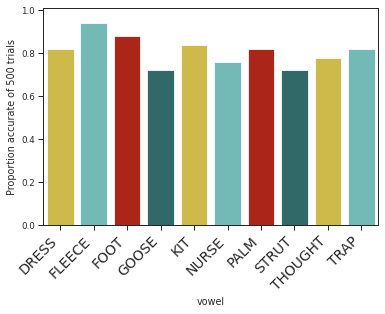

<AxesSubplot:xlabel='vowel', ylabel='Proportion accurate of 500 trials'>

In [27]:
gp.accplot(acc,'vowel')

In [34]:
print("overall accuracy: " + str(gp.overallacc(acc,'vowel')))

overall accuracy: 0.81


In [28]:
gp.propcorr(acc,'vowel')

,vowel,propcorr
0,DRESS,0.82
1,FLEECE,0.94
2,FOOT,0.88
3,GOOSE,0.72
4,KIT,0.84
5,NURSE,0.76
6,PALM,0.82
7,STRUT,0.72
8,THOUGHT,0.78
9,TRAP,0.82


### Speaker type

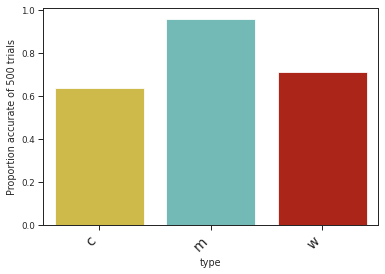

<AxesSubplot:xlabel='type', ylabel='Proportion accurate of 500 trials'>

In [36]:
gp.accplot(acc,'type')

In [37]:
print("overall accuracy: " + str(gp.overallacc(acc,'vowel')))

overall accuracy: 0.81


In [38]:
gp.propcorr(acc,'type')

,type,propcorr
0,c,0.634615
1,m,0.955157
2,w,0.710983


### Generate confusion matrices

In [39]:
gp.confusion(choices,catslist)

{'vowel': vowelChoice  DRESS  FLEECE  FOOT  GOOSE   KIT  NURSE  PALM  STRUT  THOUGHT  \
 DRESS         0.82    0.00  0.00   0.00  0.16   0.00  0.00   0.00     0.00   
 FLEECE        0.00    0.94  0.00   0.00  0.06   0.00  0.00   0.00     0.00   
 FOOT          0.00    0.00  0.88   0.06  0.00   0.04  0.00   0.02     0.00   
 GOOSE         0.00    0.00  0.22   0.72  0.04   0.00  0.00   0.00     0.02   
 KIT           0.06    0.10  0.00   0.00  0.84   0.00  0.00   0.00     0.00   
 NURSE         0.16    0.00  0.00   0.00  0.02   0.76  0.00   0.00     0.00   
 PALM          0.00    0.00  0.00   0.00  0.00   0.00  0.82   0.10     0.06   
 STRUT         0.00    0.00  0.02   0.00  0.00   0.00  0.14   0.72     0.04   
 THOUGHT       0.00    0.00  0.04   0.02  0.00   0.04  0.12   0.00     0.78   
 TRAP          0.16    0.00  0.00   0.00  0.00   0.00  0.00   0.02     0.00   
 
 vowelChoice  TRAP  
 DRESS        0.02  
 FLEECE       0.00  
 FOOT         0.00  
 GOOSE        0.00  
 KIT          0